In [2]:
include("../modules/parma_wrapper.jl")
using .Parma
using CairoMakie
using LaTeXStrings
using LinearAlgebra
using Printf

In [3]:

ip = 0            # Particle ID (Particle ID, 0:neutron, 1-28:H-Ni, 29-30:muon+-, 31:e-, 32:e+, 33:photon)
e = 100.0        # Energy (MeV/n)
iyear = 2019      # Year
imonth = 2        # Month
iday = 1          # Day
glat = 30.5    # Latitude (deg), -90 =< glat =< 90
glong = -76.2  # Longitude (deg), -180 =< glong =< 180
alti = 0.0     # Altitude (km)
g = 0.15       # Local geometry parameter, 0=< g =< 1: water weight fraction, 10:no-earth, 100:blackhole, -10< g < 0: pilot, g < -10: cabin
ang = -0.5     # cosine of zenith angle (e.g. ang=1.0 for vertical direction, ang=0.0 for holizontal direction)

# calculate parameters
s = getHP(iyear, imonth, iday)  # W-index (solar activity)
r = getr(glat, glong)           # Vertical cut-off rigidity (GV)
d = getd(alti, glat)            # Atmospheric depth (g/cm2), set glat = 100 for use US Standard Atmosphere 1976.

Flux = 0.0

Flux = getSpec(ip, s, r, d, e, g)
println(L"\rm Angular\ Integrated\ Flux\ (/cm{}^2/s/MeV n{}^{-1})) = ", Flux)

$\rm Angular\ Integrated\ Flux\ (/cm{}^2/s/MeV n{}^{-1})) = $1.4431676218428849e-5


In [4]:
available_gradients()

Gradient Symbol/Strings:
    Accent
    Accent_3
    Accent_4
    Accent_5
    Accent_6
    Accent_7
    Accent_8
    Anemone
    Archambault
    AsteroidCity1
    AsteroidCity2
    AsteroidCity3
    Austria
    Bay
    Benedictus
    Blues
    Blues_3
    Blues_4
    Blues_5
    Blues_6
    Blues_7
    Blues_8
    Blues_9
    BottleRocket1
    BottleRocket2
    BrBG
    BrBG_10
    BrBG_11
    BrBG_3
    BrBG_4
    BrBG_5
    BrBG_6
    BrBG_7
    BrBG_8
    BrBG_9
    BrBg
    BuGn
    BuGn_3
    BuGn_4
    BuGn_5
    BuGn_6
    BuGn_7
    BuGn_8
    BuGn_9
    BuPu
    BuPu_3
    BuPu_4
    BuPu_5
    BuPu_6
    BuPu_7
    BuPu_8
    BuPu_9
    CMRmap
    Cascades
    Cassatt1
    Cassatt2
    Catppuccin_frappe
    Catppuccin_latte
    Catppuccin_macchiato
    Catppuccin_mocha
    Cavalcanti1
    Chevalier1
    Cross
    Darjeeling1
    Darjeeling2
    Dark2
    Dark2_3
    Dark2_4
    Dark2_5
    Dark2_6
    Dark2_7
    Dark2_8
    Degas
    Demuth
    Derain
    Egypt
    Fantasti

In [69]:
abs((-180+0im)^1.1)

302.55181013510816

┌ Warning: Assignment to `ax` in soft scope is ambiguous because a global variable by the same name exists: `ax` will be treated as a new local. Disambiguate by using `local ax` to suppress this warning or `global ax` to assign to the existing global variable.
└ @ ~/lecture/4S-experiments/modules/flux_heatmap.jl:36


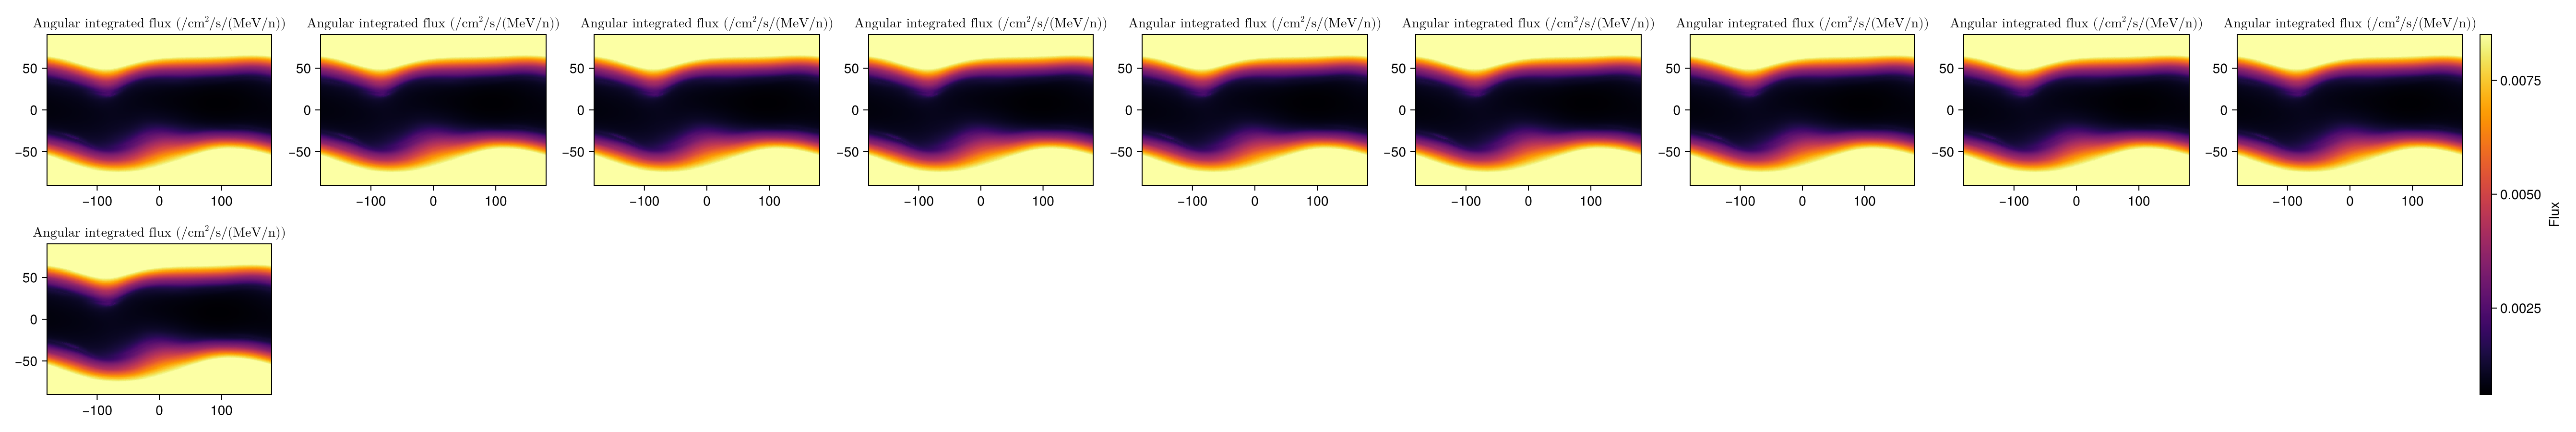

In [112]:
include("../modules/flux_heatmap.jl")


In [ ]:
function graph_coordinates!(plt, lat, lon, alti; i = 1, format_tick = false, clims=(0, 4e-3))
  flux = @. getSpec(ip, s, getr(lat, lon'), getd(alti, lat), e, g)
  xticks = range(lon[1], stop=lon[end], length=13)
  yticks = range(lat[1], stop=lat[end], length=7)
  tick_formatter = x -> typeof(x) == Integer ? x : @sprintf("%.1f", x)
  heatmap!(plt, lon, lat, flux,
      xlabel="Longitude (deg)",
      ylabel="Latitude (deg)",
      title="altitude = $alti",
      xticks=format_tick ? (xticks, tick_formatter.(xticks)) : xticks,
      yticks=format_tick ? (yticks, tick_formatter.(xticks)) : yticks,
      c=:auto,
      clims=clims,
      colorbar=true,
      subplot=i
  )
end
lat = range(-90, stop=90, length=300)
lon = range(-180, stop=180, length=300)
alti = 18.
title=L"\mathrm{Angular\ integrated\ flux\ (/cm^2/s/(MeV/n))}"
flux = @. getSpec(ip, s, getr(lat', lon), getd(alti, lat'), e, g)
fig = Figure()

for i in 1:9
  ax = Axis(fig[1, i], title=title)
  heatmap!(ax, lon, lat, flux, colormap=:inferno)
  colsize!(fig.layout, i, Aspect(1, 1.5))
end
ax = Axis(fig[2, 1], title=title)
plotobj = heatmap!(ax, lon, lat, flux, colormap=:inferno)
Colorbar(fig[:, end+1], fig., label="Flux", labelrotation=π/2)

colsize!(fig.layout, 1, Aspect(1, 1.5))
resize_to_layout!(fig)
fig

LoadError: MethodError: no method matching getindex(::Base.RefValue{Any}, ::Int64)
The function `getindex` exists, but no method is defined for this combination of argument types.

[0mClosest candidates are:
[0m  getindex(::Ref, [91m::CartesianIndex{0}[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mmultidimensional.jl:1952[24m[39m
[0m  getindex(::Base.RefValue)
[0m[90m   @[39m [90mBase[39m [90m[4mrefvalue.jl:59[24m[39m


In [ ]:
x = y = -5:0.5:5
z = x .^ 2 .+ y' .^ 2
cmap = :plasma
with_theme(colormap = cmap) do
    fig = Figure(fontsize = 22)
    ax3d = Axis3(fig[1, 1]; aspect = (1, 1, 1),
        perspectiveness = 0.5, azimuth = 2.19, elevation = 0.57)
    ax2d = Axis(fig[1, 2]; aspect = 1, xlabel = "x", ylabel="y")
    pltobj = surface!(ax3d, x, y, z; transparency = true)
    heatmap!(ax2d, x, y, z; colormap = (cmap, 0.65))
    contour!(ax2d, x, y, z; linewidth = 2, levels = 12, color = :black)
    contour3d!(ax3d, x, y, z; linewidth = 4, levels = 12,
        transparency = true)
    Colorbar(fig[1, 3], pltobj; label="z", labelrotation=pi)
    colsize!(fig.layout, 1, Aspect(1, 1.0))
    colsize!(fig.layout, 2, Aspect(1, 1.0))
    resize_to_layout!(fig)
    fig
end

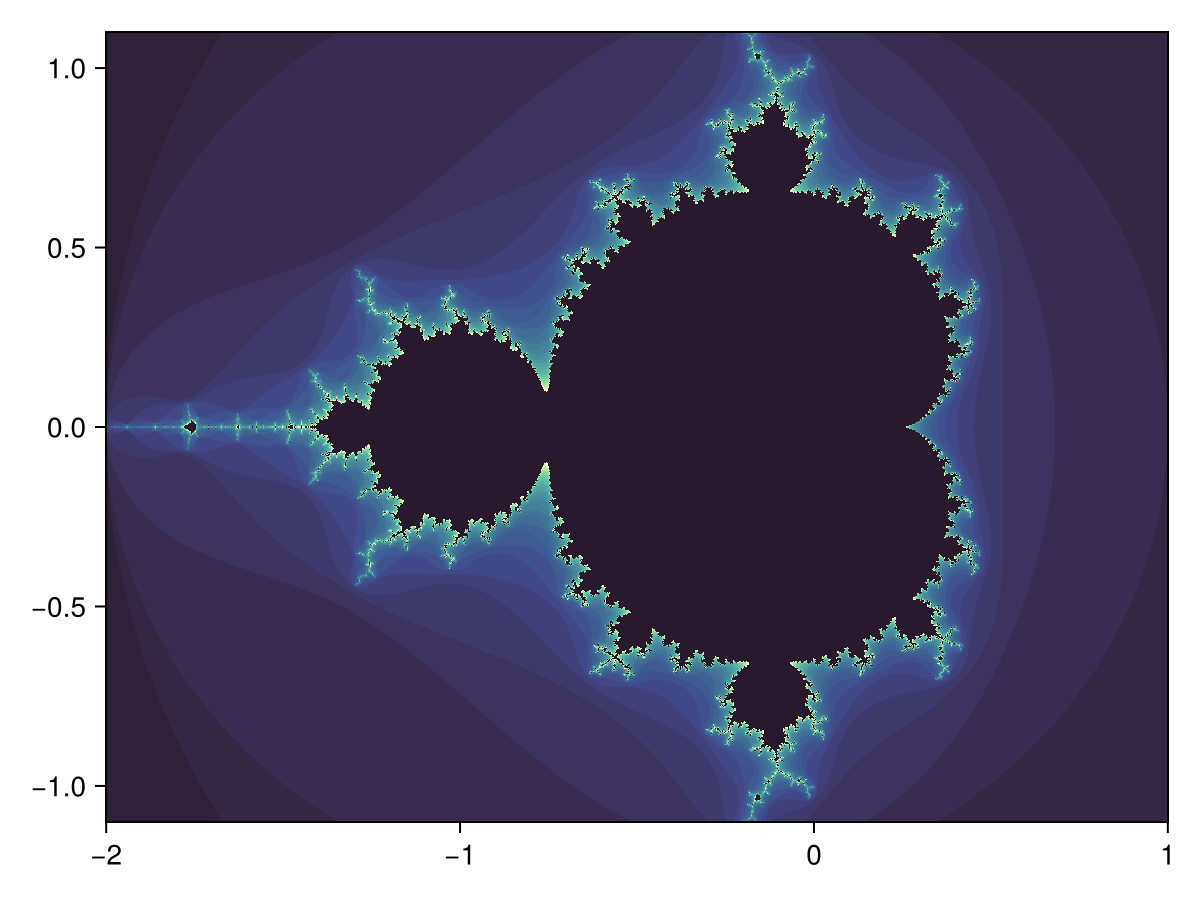

In [15]:
using CairoMakie
function mandelbrot(x, y)
    z = c = x + y*im
    for i in 1:30.0; abs(z) > 2 && return i; z = z^2 + c; end; 0
end

fig, ax, hm = heatmap(-2:0.001:1, -1.1:0.001:1.1, mandelbrot,
    colormap = Reverse(:deep))

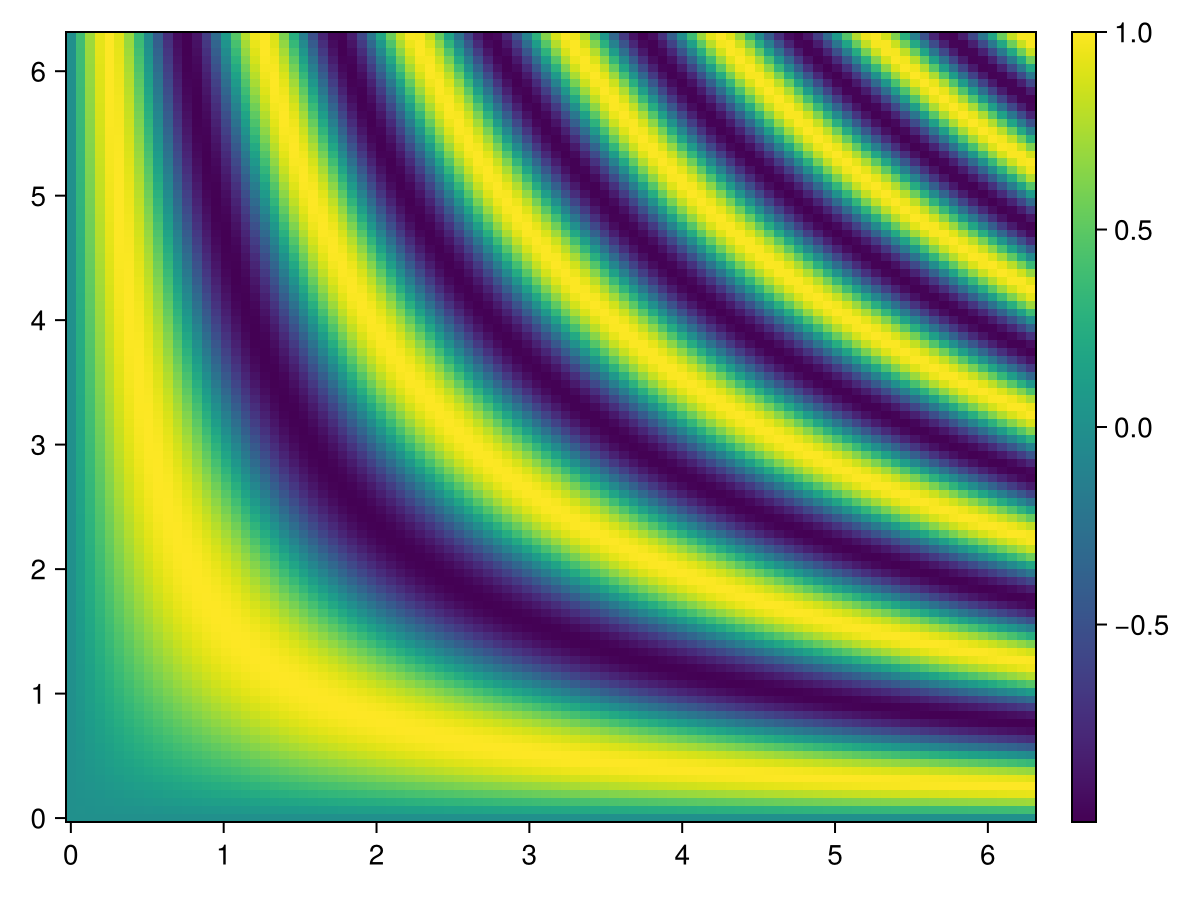

In [2]:
using CairoMakie
xs = range(0, 2π, length=100)
ys = range(0, 2π, length=100)
zs = [sin(x*y) for x in xs, y in ys]

fig, ax, hm = heatmap(xs, ys, zs)
Colorbar(fig[:, end+1], hm)

fig